<a href="https://colab.research.google.com/github/vzMars/CMP765/blob/main/Week02_MotivatingExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2
# A Motivating Example of Deep Learning
- An introduction to artificial neural networks
- Getting to know PyTorch
- A deep learning project on recognizing hand-written digits.

*Readings: Deep Learning with PyTorch, Chapter 1.*

## 1. A Basic Neural Network Model

At its core, the deep learning system is a rather complex mathematical function that maps inputs to outputs.

<img src="https://github.com/ch00226855/temp/blob/e4b3b9404122e50dd367f859b43a6dc984b59cec/.ipynb_checkpoints/Screenshot%20from%202024-02-05%2009-20-01.png?raw=true" width=300>

Deep Learning is supported by a type of machine learning models called **artificial neural network**. An artificial neural network consists of many **artifical neurons**.

A typical artificial neurons is created with the following components:
- **Input channels**: where the neuron gets information
- **Weight parameters**: Each input value will be multiplied by a corresponding weight parameter before being considered by the activation function.
- **Biase parameter**: a constant value added to the weighted sum of inputs.
- **Activation function**: a non-linear function that generates the output of a neuron.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/general-diagram-of-perceptron-for-supervised-learning_4.jpg" height=300>

If we create a network with at least three layers of artifical neurons, this machine learning model is called a **deep neural network**.

<img src="https://qph.cf2.quoracdn.net/main-qimg-a1efd90fe8d2146d2dcaa629385056ff" width=300>

For each layer:
- The weight parameters are organized as a **weight matrix**.
- The biase parameters are organized as a **biase vector**.
- The output values are also organized as a vector.

To implements these computations, the computer often need to work with arrays of dimension 2, 3, or even higher. These arrays are called **tensors**. **PyTorch** is a framework that supports fast tensor computations.

<img src="https://miro.medium.com/v2/resize:fit:500/1*MQIAAntN5tYgKEDNTcpZmg.png" width=300>

## 2. A Deep Learning Playground

Before creating a deep learning model on our own, let's gain some intuition of how it works from the [deep learning playground](https://playground.tensorflow.org/
)

<img src="https://human-centered.ai/wordpress/wp-content/uploads/2016/04/Deep-learning.png" width=200>

## 3. PyTorch for Deep Learning

**PyTorch** is a Python library that facilitaes building deep learning projects.
- PyTorch is easy to use. One can test and manipulate various model components before the entire model is built.
- PyTorch is fast. Most of PyTorch is written in C++ and CUDA. It supports fast tensor computations, which is the most time-consuming part of a deep learning project.
- PyTorch can accelerate computation using graphical processing unites (GPUs). GPUs can do computation 50x faster than CPUs with a similar price.

In [ ]:
import torch
torch.__version__

In [ ]:
# GPU can be turned on in "Edit" -> "Notebook Settings"
torch.cuda.is_available()

In [ ]:
# Create a tensor directly from data.
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9.12]]
data_tensor = torch.tensor(data)
print(data_tensor)

In [ ]:
# Attributes of a tensor
print("Shape of tensor:", data_tensor.shape)
print("Datatype of tensor:", data_tensor.dtype)
print("Device the tensor is stored on:", data_tensor.device)

In [ ]:
# Matrix addition and multiplication
# data_tensor + data_tensor
# data_tensor * data_tensor
data_tensor @ data_tensor

## 4. MNIST Image Classification

The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width=300>

Let's create a deep neural network model that can be used to identify these images.

*Reference*: [PyTorch quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

### Loading Data

In [ ]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
training_data.data.shape
# training_data.data.dtype
# training_data.data.device
# training_data.data[0]
# training_data.data[1, :, range(0, 28, 2)]

torch.Size([60000, 28, 28])

In [ ]:
print("Total number of values contained in the training data set:", 60000 * 28 * 28)

Total number of values contained in the training data set: 47040000


In [ ]:
# training_data.targets.shape
training_data.targets[0:2]

tensor([5, 0])

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Creating Models

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
# Define model
class NeuralNetwork(nn.Module): # Build the new class by extending the Module class
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # Creates a layer to flatten a 2D array
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # This is one dense layer
            nn.ReLU(),
            nn.Linear(512, 512),   # Another dense layer
            nn.ReLU(),
            nn.Linear(512, 10)     # The output layer.
        )                          # It has only 10 nodes because we need 10
                                   # probabilities for the prediction.

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing Model Parameters

To train a model, we need a loss function and an optimizer.
- The **loss function** is to evaluate the current performance of the model on the training data. Smaller losses indicate better performances.
- The **optimizer** suggests parameter modifications so that the model's performance may get improved.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model’s performance against another dataset (the test dataset) to ensure it is learning.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.609651  [   64/60000]
loss: 1.515071  [ 6464/60000]
loss: 1.624050  [12864/60000]
loss: 1.417194  [19264/60000]
loss: 1.437380  [25664/60000]
loss: 1.410792  [32064/60000]
loss: 1.337099  [38464/60000]
loss: 1.483137  [44864/60000]
loss: 1.338112  [51264/60000]
loss: 1.289636  [57664/60000]
Test Error: 
 Accuracy: 76.9%, Avg loss: 1.261710 

Epoch 2
-------------------------------
loss: 1.313123  [   64/60000]
loss: 1.190597  [ 6464/60000]
loss: 1.304360  [12864/60000]
loss: 1.121380  [19264/60000]
loss: 1.130526  [25664/60000]
loss: 1.104056  [32064/60000]
loss: 1.045699  [38464/60000]
loss: 1.204376  [44864/60000]
loss: 1.087697  [51264/60000]
loss: 1.034428  [57664/60000]
Test Error: 
 Accuracy: 79.8%, Avg loss: 1.007532 

Epoch 3
-------------------------------
loss: 1.083172  [   64/60000]
loss: 0.950049  [ 6464/60000]
loss: 1.050065  [12864/60000]
loss: 0.912512  [19264/60000]
loss: 0.917288  [25664/60000]
loss: 0.889071  [32064/600

In [ ]:
# Exercise: Select 3 images from the test set and examine the model predictions.

model.eval() # Turn the model to evaluation model

In [ ]:
# Select three random images from the test set
# selected_indices = [100, 200, 300]  # Change these indices as needed
# selected_images = [test_data[i][0] for i in selected_indices]
# selected_labels = [test_data[i][1] for i in selected_indices]

In [ ]:
for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)

    selected_indices = [15, 25, 35]
    selected_images = X[selected_indices, :, :, :]
    selected_labels = y[selected_indices]
    # print(selected_images)
    # print(selected_labels)
    break

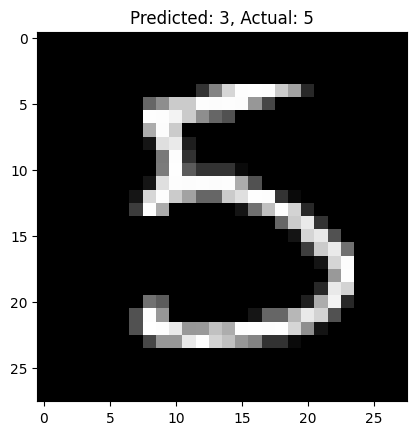

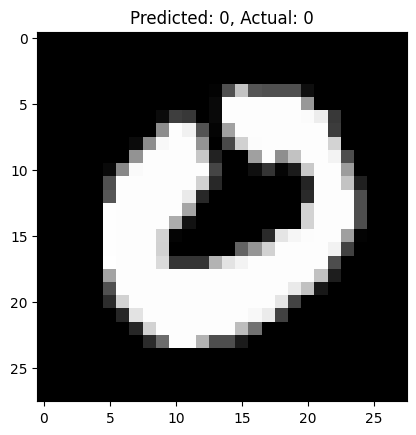

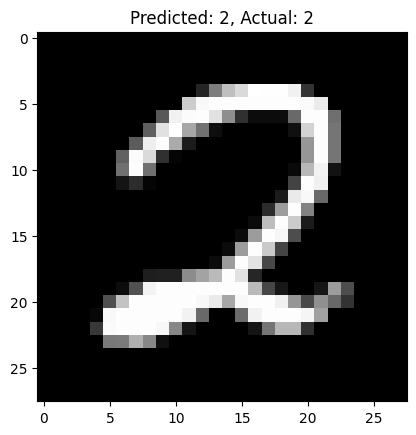

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
    for i, image in enumerate(selected_images):
        image = image.unsqueeze(0)  # Add batch dimension
        output = model(image)
        predicted_label = output.argmax(dim=1).item()

        plt.imshow(image.cpu().squeeze().numpy(), cmap='gray')
        plt.title(f"Predicted: {predicted_label}, Actual: {selected_labels[i]}")
        plt.show()


## Exercise: Recreate the Neural Network

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e4ece928400>,
 <torch.utils.data.dataloader.DataLoader at 0x7e4ece9284f0>)

In [ ]:
class OurModel(nn.Module):

    def __init__(self):
        super().init()
        self.layer1 = nn.Flatten()
        self.layer2 = nn.Linear(28*28, 512)
        self.layer2_5 = nn.ReLU()
        self.layer3 = nn.Linear(512, 512)
        self.layer3_5 = nn.ReLU()
        self.layer4 = nn.Linear(512, 10)

    def forward(self, img):
        x1 = self.layer1(img)
        x2 = self.layer2_5(self.layer2(x1))
        x3 = self.layer3_5(self.layer3(x2))
        output = self.layer4(x3)
        return output